In [52]:
#importacoes

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Censo

## Lendo a base

In [53]:
base_censo = pd.read_csv('census.csv')
base_censo

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Esplorando os Dados

In [54]:
base_censo.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [55]:
base_censo.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

In [56]:
base_censo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [57]:
base_censo.nunique()

age                  73
workclass             9
final-weight      21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loos         92
hour-per-week        94
native-country       42
income                2
dtype: int64

## Gráficos

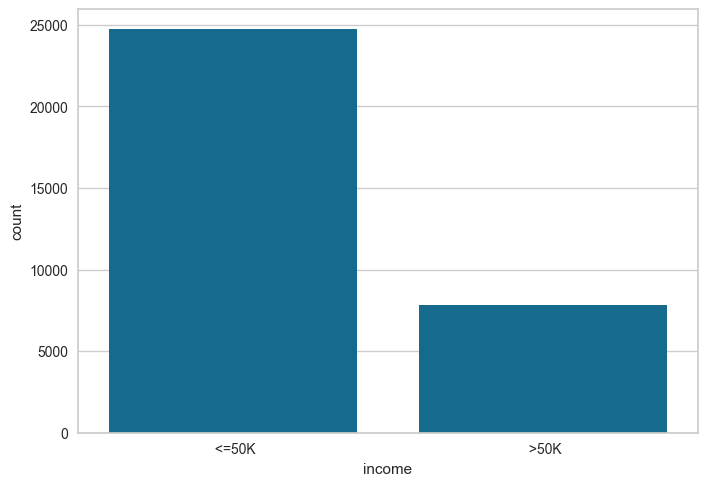

In [58]:
sns.countplot(x= base_censo['income']);

<Axes: >

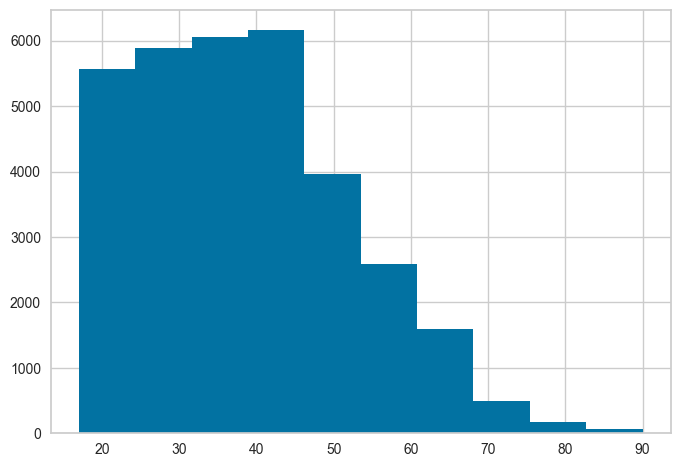

In [59]:
base_censo['age'].hist()

<Axes: >

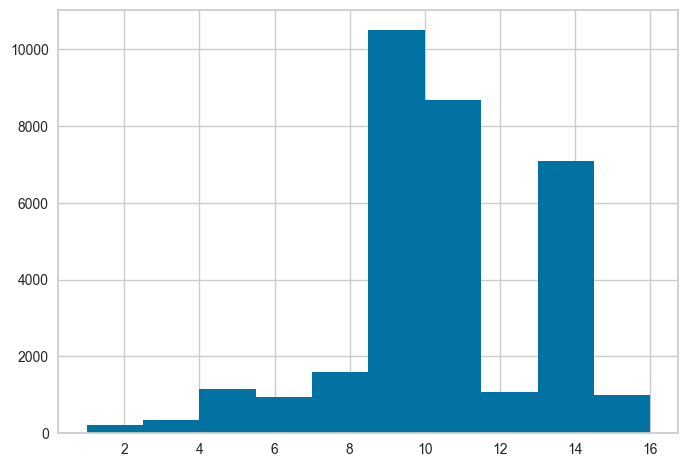

In [60]:
base_censo['education-num'].hist()

<Axes: >

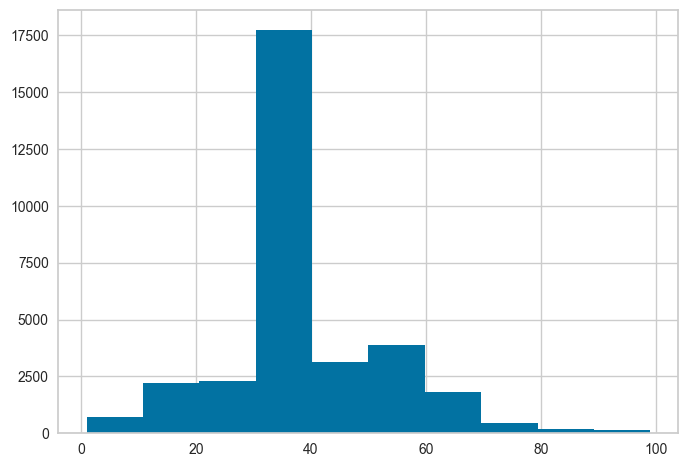

In [61]:
base_censo['hour-per-week'].hist()

In [62]:
grafico = px.treemap(base_censo, path=['workclass', 'age'])
grafico.show()

In [63]:
grafico = px.treemap(base_censo, path=['occupation', 'relationship', 'age'])
grafico.show()

In [64]:
grafico = px.parallel_categories(base_censo, dimensions=['occupation', 'relationship'])
grafico.show()

In [65]:
grafico = px.parallel_categories(base_censo, dimensions=['education', 'income'])
grafico.show()

## Previsores e Classe

In [66]:
base_censo.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [67]:
x_censo = base_censo.iloc[:, 0:14].values
x_censo

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [68]:
y_censo = base_censo.iloc[:, 14].values
y_censo

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

## Transformando atributos

### Label Encoder


In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
label_encoder_workclass =LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()


In [71]:
x_censo[:, 1] = label_encoder_workclass.fit_transform(x_censo[:, 1])
x_censo[:, 3] = label_encoder_education.fit_transform(x_censo[:, 3])
x_censo[:, 5] = label_encoder_marital.fit_transform(x_censo[:, 5])
x_censo[:, 6] = label_encoder_occupation.fit_transform(x_censo[:, 6])
x_censo[:, 7] = label_encoder_relationship.fit_transform(x_censo[:, 7])
x_censo[:, 8] = label_encoder_race.fit_transform(x_censo[:, 8])
x_censo[:, 9] = label_encoder_sex.fit_transform(x_censo[:, 9])
x_censo[:, 13] = label_encoder_country.fit_transform(x_censo[:, 13])

### One Hot Encoder

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [73]:
onehotencoder_censo = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder='passthrough')

In [74]:
x_censo = onehotencoder_censo.fit_transform(x_censo).toarray()

In [75]:
x_censo.shape

(32561, 108)

## Escalonamento

In [76]:
from sklearn.preprocessing import StandardScaler
scaler_censo = StandardScaler()

In [77]:
x_censo = scaler_censo.fit_transform(x_censo)
x_censo

array([[-0.2444502 , -0.17429511, -0.26209736, ...,  0.1484529 ,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -2.22215312],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       ...,
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -0.03542945],
       [-0.2444502 , -0.17429511, -0.26209736, ..., -0.14592048,
        -0.21665953, -1.65522476],
       [-0.2444502 , -0.17429511, -0.26209736, ...,  1.88842434,
        -0.21665953, -0.03542945]])

## Divisão de treino e teste

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_censo_treinamento, x_censo_teste, y_censo_treinamento, y_censo_teste = train_test_split(x_censo, y_censo, test_size=0.15, random_state=0)

## Salvando as variáveis

In [80]:
import pickle

In [81]:
with open('censo.pkl', mode= 'wb') as f:
    pickle.dump([x_censo_treinamento, x_censo_teste, y_censo_treinamento, y_censo_teste], f)

##  Algoritmos 

### Neive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
naive_censo = GaussianNB()

In [84]:
naive_censo.fit(x_censo_treinamento, y_censo_treinamento)

GaussianNB()

In [85]:
previsoes = naive_censo.predict(x_censo_teste)

### Verificando os erros e acertos

In [86]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [87]:
accuracy_score(y_censo_teste, previsoes)

0.4767656090071648

### Verificando os erros e acertos

In [88]:
from yellowbrick.classifier import ConfusionMatrix

0.4767656090071648

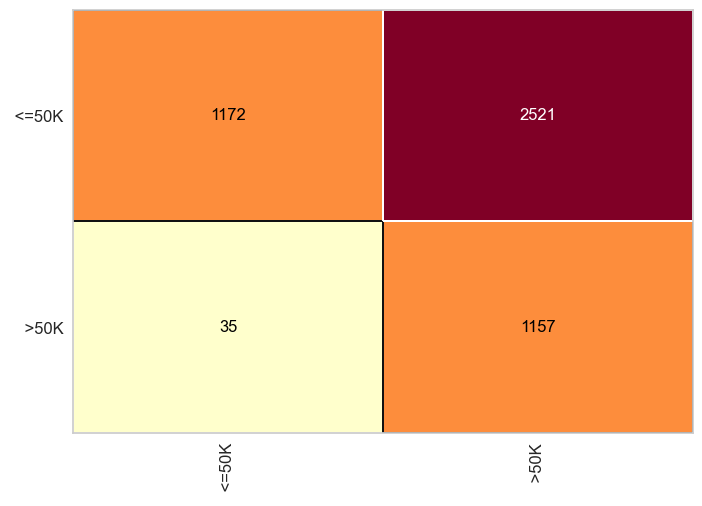

In [89]:
cm = ConfusionMatrix(naive_censo)
cm.fit(x_censo_treinamento, y_censo_treinamento)
cm.score(x_censo_teste, y_censo_teste)

In [90]:
print(classification_report(y_censo_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.97      0.32      0.48      3693
        >50K       0.31      0.97      0.48      1192

    accuracy                           0.48      4885
   macro avg       0.64      0.64      0.48      4885
weighted avg       0.81      0.48      0.48      4885



### Arvore de decisao

In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
arvore_censo = DecisionTreeClassifier(criterion='entropy' ,random_state=0)

In [93]:
arvore_censo.fit(x_censo_treinamento, y_censo_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [94]:
previsoes = arvore_censo.predict(x_censo_teste)

### Verificando os erros e acertos

In [95]:
accuracy_score(y_censo_teste, previsoes)

0.8104401228249745

0.8104401228249745

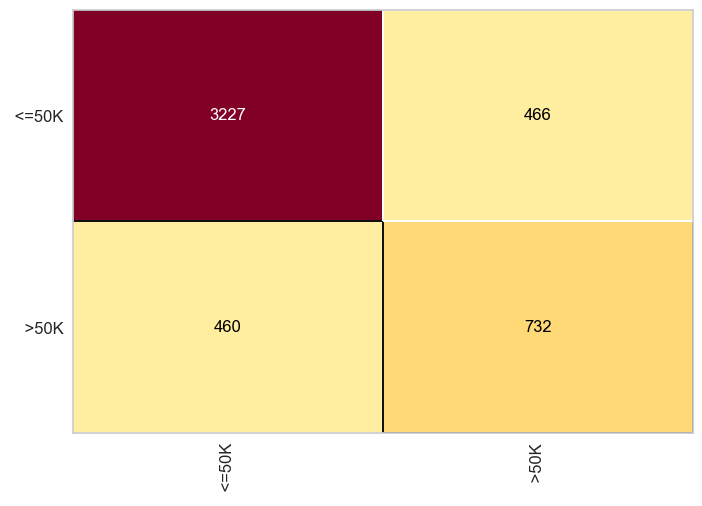

In [96]:
cm = ConfusionMatrix(arvore_censo)
cm.fit(x_censo_treinamento, y_censo_treinamento)
cm.score(x_censo_teste, y_censo_teste)

In [97]:
print(classification_report(y_censo_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



### Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
random_forest_censo = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)

In [127]:
random_forest_censo.fit(x_censo_treinamento, y_censo_treinamento)

RandomForestClassifier(criterion='entropy', random_state=0)

In [128]:
previsoes = random_forest_censo.predict(x_censo_teste)

In [129]:
accuracy_score(y_censo_teste, previsoes)

0.8507676560900717

0.8507676560900717

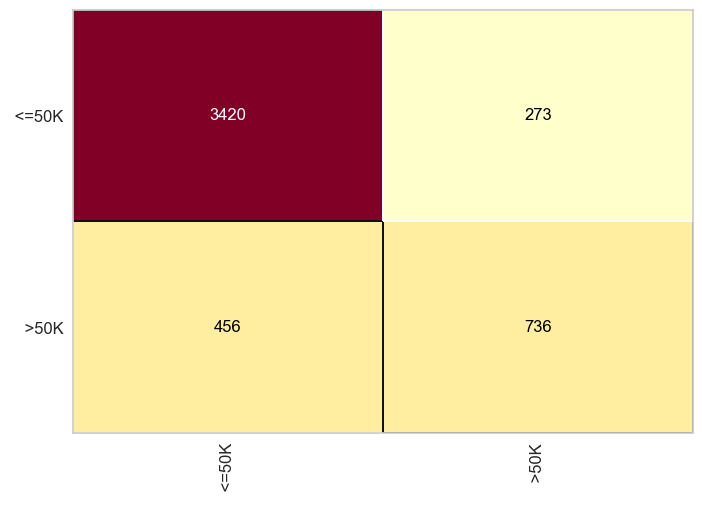

In [130]:
cm = ConfusionMatrix(random_forest_censo)
cm.fit(x_censo_treinamento, y_censo_treinamento)
cm.score(x_censo_teste, y_censo_teste)

In [131]:
print(classification_report(y_censo_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      3693
        >50K       0.73      0.62      0.67      1192

    accuracy                           0.85      4885
   macro avg       0.81      0.77      0.79      4885
weighted avg       0.85      0.85      0.85      4885

